In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
import numpy as np
import seaborn as sns

# For PCA and tSNE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

train_data = pd.read_csv('./inputs/train.csv')
test_data = pd.read_csv('./inputs/test.csv')

example_downstairs = pd.read_excel('./inputs/downstairs_with_barometer_2.xls')
example_upstairs = pd.read_excel('./inputs/upstairs_with_barometer.xls')

In [159]:
example_downstairs

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,0.001405,-5.143372,5.157729,6.814161
1,0.020471,-5.106284,4.886742,7.169495
2,0.039917,-5.093123,4.745565,7.340582
3,0.059364,-5.115257,4.832903,7.143174
4,0.078810,-5.051249,4.843671,6.939784
...,...,...,...,...
5897,112.437701,0.813560,5.477171,8.420342
5898,112.456767,0.937986,5.272585,8.714660
5899,112.475832,0.796212,5.269594,8.737391
5900,112.494897,0.721436,5.363512,8.721839


In [124]:
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [125]:
train_is_UP =  train_data['Activity']=='WALKING_UPSTAIRS'
test_is_UP =  test_data['Activity']=='WALKING_UPSTAIRS'
train_data_UP = train_data[train_is_UP]
test_data_UP = test_data[test_is_UP]
train_data_UP

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
150,0.183604,-0.076559,-0.046956,-0.367516,-0.099161,0.020546,-0.412729,-0.107323,0.087381,-0.220939,...,-0.685946,0.198799,-0.515058,-0.960808,0.798595,-0.730180,0.275743,0.075790,1,WALKING_UPSTAIRS
151,0.279183,-0.036966,-0.133604,-0.359032,-0.124112,-0.102868,-0.394230,-0.120456,-0.027792,-0.319136,...,-0.621552,-0.183312,-0.366714,-0.932361,0.257390,-0.695481,0.303214,0.065482,1,WALKING_UPSTAIRS
152,0.301162,-0.001759,-0.106830,-0.362666,0.001220,-0.111538,-0.400837,-0.001549,-0.028194,-0.269518,...,-0.881817,-0.140795,-0.235431,-0.904871,-0.524824,-0.681620,0.311837,0.070519,1,WALKING_UPSTAIRS
153,0.293411,-0.018715,-0.066159,-0.368157,0.095663,-0.019262,-0.430579,0.108432,0.027044,-0.169848,...,-0.834194,-0.099332,-0.413970,-0.968821,-0.132384,-0.686715,0.308243,0.070468,1,WALKING_UPSTAIRS
154,0.230310,0.002174,-0.043103,-0.335254,-0.020444,0.031210,-0.398985,-0.039489,0.097693,-0.169848,...,-0.862534,0.360594,0.455744,0.777628,-0.057846,-0.693267,0.306133,0.058967,1,WALKING_UPSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [126]:
train_is_DOWN = train_data['Activity']=='WALKING_DOWNSTAIRS'
test_is_DOWN = test_data['Activity']=='WALKING_DOWNSTAIRS'
train_data_DOWN = train_data[train_is_DOWN]
test_data_DOWN = test_data[test_is_DOWN]
test_data_DOWN

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
109,0.392763,-0.059174,-0.110928,-0.148422,0.048984,-0.296346,-0.225294,0.008386,-0.286232,0.396940,...,0.365522,-0.733380,-0.143743,0.839996,-0.487323,-0.664086,0.329820,0.004401,2,WALKING_DOWNSTAIRS
110,0.333227,-0.024943,-0.158919,-0.104144,-0.013973,-0.329714,-0.191389,-0.029694,-0.287530,0.396940,...,0.394829,-0.388198,0.347043,0.858506,0.335422,-0.654154,0.336826,0.007205,2,WALKING_DOWNSTAIRS
111,0.316154,0.001277,-0.065453,-0.151633,0.116282,-0.153958,-0.258230,0.040523,-0.174623,0.318677,...,-0.660156,-0.140775,0.072527,0.909308,0.355700,-0.658090,0.334342,0.017117,2,WALKING_DOWNSTAIRS
112,0.153661,-0.010078,-0.043895,-0.214278,0.132208,-0.199881,-0.357468,0.025411,-0.259067,0.318677,...,-0.122492,0.554922,-0.335483,0.989290,-0.168345,-0.676271,0.321730,0.012499,2,WALKING_DOWNSTAIRS
113,0.071035,-0.015656,-0.094263,-0.213424,0.065907,-0.379623,-0.337972,-0.013718,-0.382558,0.301304,...,-0.492669,0.804323,-0.725508,-0.643705,-0.429319,-0.674603,0.322813,0.010090,2,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2932,0.126970,-0.013276,-0.073441,-0.173816,0.041540,-0.342513,-0.253156,-0.093578,-0.350155,0.285773,...,-0.252670,0.872466,0.491872,-0.155724,-0.762511,-0.800932,0.190968,0.123600,24,WALKING_DOWNSTAIRS
2933,0.363943,-0.022212,-0.125437,-0.041180,0.020777,-0.243607,-0.113519,-0.120400,-0.221709,0.411506,...,-0.205856,-0.895624,0.648047,-0.624180,-0.441569,-0.803888,0.191732,0.119944,24,WALKING_DOWNSTAIRS
2934,0.331044,-0.063979,-0.117333,-0.068002,0.156431,-0.317060,-0.148922,0.070107,-0.290868,0.411506,...,-0.468001,-0.351287,-0.335934,0.966914,-0.715323,-0.810091,0.184712,0.120724,24,WALKING_DOWNSTAIRS
2935,0.272259,-0.007579,-0.072642,-0.072559,0.005472,-0.225400,-0.161118,-0.074187,-0.280956,0.402615,...,-0.408741,0.181631,0.491898,-0.977969,-0.124243,-0.797719,0.194819,0.122937,24,WALKING_DOWNSTAIRS


In [163]:
train_is_WALKING = train_data['Activity']=='WALKING'
test_is_WALKING = test_data['Activity']=='WALKING'
train_data_WALKING = train_data[train_is_WALKING]
test_data_WALKING = test_data[test_is_WALKING]
test_data_WALKING

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
79,0.203962,-0.032345,-0.096881,-0.465504,-0.180785,-0.455108,-0.497882,-0.242498,-0.458406,-0.179696,...,-0.586288,0.480130,0.619329,0.892920,-0.311693,-0.675693,0.321986,0.008134,2,WALKING
80,0.249343,-0.003411,-0.056042,-0.399476,-0.137845,-0.461271,-0.437246,-0.198605,-0.453340,-0.179696,...,-0.808660,0.258529,0.038298,0.904697,-0.421875,-0.670009,0.325729,0.004459,2,WALKING
81,0.325051,-0.029804,-0.077847,-0.465120,0.013453,-0.367646,-0.500004,-0.032380,-0.341866,-0.339242,...,-0.864935,-0.536458,-0.492501,-0.622143,-0.409633,-0.671101,0.324747,0.001002,2,WALKING
82,0.308808,-0.022128,-0.132104,-0.514826,0.032009,-0.349003,-0.553718,-0.000161,-0.312035,-0.392279,...,-0.234549,-0.444236,0.224709,-0.836464,-0.603949,-0.671904,0.324348,0.003296,2,WALKING
83,0.265599,-0.015936,-0.120750,-0.500950,-0.163230,-0.389428,-0.537218,-0.159272,-0.367618,-0.302921,...,-0.643889,0.371001,0.731077,-0.855379,-0.111921,-0.676391,0.321438,0.006704,2,WALKING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,0.259172,-0.008408,-0.083012,-0.483303,-0.130209,-0.305842,-0.488393,-0.181297,-0.301262,-0.392891,...,0.199377,0.365598,0.076656,0.374991,-0.145443,-0.817014,0.172039,0.125107,24,WALKING
2885,0.248799,-0.015695,-0.103801,-0.510188,-0.111773,-0.322375,-0.507802,-0.182804,-0.320156,-0.463048,...,-0.187534,0.947383,-0.338707,-0.806335,0.352414,-0.822527,0.170455,0.121438,24,WALKING
2886,0.247290,-0.024840,-0.141388,-0.593275,-0.124444,-0.427655,-0.614110,-0.196080,-0.430790,-0.508640,...,-0.576973,0.211248,-0.708733,0.271323,-0.529599,-0.819168,0.175519,0.120376,24,WALKING
2887,0.277149,0.003709,-0.113742,-0.594104,-0.093302,-0.441025,-0.626089,-0.136955,-0.424460,-0.514281,...,-0.313433,0.071932,-0.594592,0.482462,0.103639,-0.809132,0.180466,0.125399,24,WALKING


In [128]:
train_data['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [164]:
# 2.1 Visualize data
# combine both test and train data
full_data_DOWN = pd.concat([train_data_DOWN, test_data_DOWN], axis=0).reset_index(drop=True)
full_data_UP = pd.concat([train_data_UP, test_data_UP], axis=0).reset_index(drop=True)
full_data_WALKING = pd.concat([train_data_WALKING, test_data_WALKING], axis=0).reset_index(drop=True)
full_data = pd.concat([full_data_DOWN, full_data_UP, full_data_WALKING], axis = 0).reset_index(drop=True)
# Look at the shape of dataframes
print('Shape Train: {}'.format(full_data.shape))
print('Shape Test: {}\n'.format(full_data.shape))
full_data

Shape Train: (4672, 563)
Shape Test: (4672, 563)



,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.358455,0.017975,-0.084159,-0.171988,-0.188332,-0.399555,-0.218408,-0.246541,-0.363535,0.244225,...,-0.691170,-0.294788,-0.582192,0.046131,-0.112673,-0.768340,0.256712,0.040474,1,WALKING_DOWNSTAIRS
1,0.301715,-0.007049,-0.093681,-0.040143,-0.141421,-0.325831,-0.079918,-0.182830,-0.281562,0.199676,...,-0.781699,-0.272805,0.315993,0.783686,-0.288010,-0.790764,0.242048,0.032582,1,WALKING_DOWNSTAIRS
2,0.281552,-0.016110,-0.140093,-0.094665,-0.007348,-0.347492,-0.151053,-0.142693,-0.315866,0.199676,...,-0.729144,-0.048504,0.653022,0.972225,0.530882,-0.802236,0.234166,0.031817,1,WALKING_DOWNSTAIRS
3,0.273956,-0.022899,-0.127256,-0.133382,0.132265,-0.336174,-0.211594,-0.051626,-0.318214,0.336350,...,-0.656273,0.000211,0.068551,0.955958,-0.616748,-0.803619,0.231639,0.043237,1,WALKING_DOWNSTAIRS
4,0.299957,0.014082,-0.082310,0.069268,0.057800,-0.235050,-0.041806,-0.111045,-0.209609,0.531491,...,-0.916847,-0.027583,0.432610,-0.943390,0.107830,-0.800668,0.233024,0.046865,1,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4667,0.259172,-0.008408,-0.083012,-0.483303,-0.130209,-0.305842,-0.488393,-0.181297,-0.301262,-0.392891,...,0.199377,0.365598,0.076656,0.374991,-0.145443,-0.817014,0.172039,0.125107,24,WALKING
4668,0.248799,-0.015695,-0.103801,-0.510188,-0.111773,-0.322375,-0.507802,-0.182804,-0.320156,-0.463048,...,-0.187534,0.947383,-0.338707,-0.806335,0.352414,-0.822527,0.170455,0.121438,24,WALKING
4669,0.247290,-0.024840,-0.141388,-0.593275,-0.124444,-0.427655,-0.614110,-0.196080,-0.430790,-0.508640,...,-0.576973,0.211248,-0.708733,0.271323,-0.529599,-0.819168,0.175519,0.120376,24,WALKING
4670,0.277149,0.003709,-0.113742,-0.594104,-0.093302,-0.441025,-0.626089,-0.136955,-0.424460,-0.514281,...,-0.313433,0.071932,-0.594592,0.482462,0.103639,-0.809132,0.180466,0.125399,24,WALKING


In [130]:
# Data type of the columns and no of nulls
print("No. of nulls: {}".format(full_data.isna().sum().sum()))

No. of nulls: 0


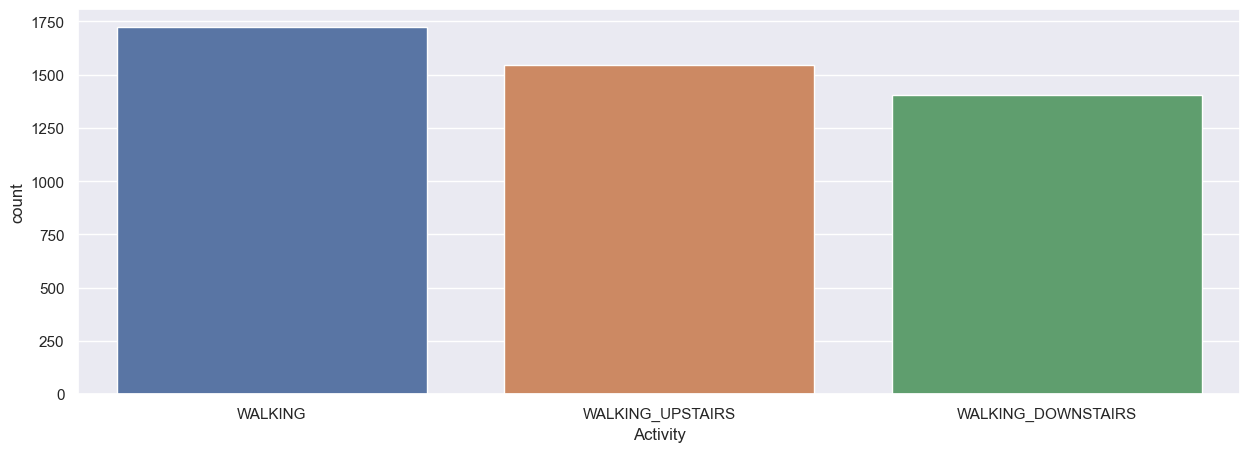

In [165]:
# Our main aim is to categorize an activity in to one of the six we have, 
# so let's take a look on how the label is distributed.
sns.set(style='darkgrid')
plt.figure(figsize=(15,5))
ax = sns.countplot(x='Activity', data=full_data, order=full_data['Activity'].value_counts().index)

In [166]:
# Create label
full_data_copy = full_data.copy()
label = full_data_copy.pop('Activity')

label

0       WALKING_DOWNSTAIRS
1       WALKING_DOWNSTAIRS
2       WALKING_DOWNSTAIRS
3       WALKING_DOWNSTAIRS
4       WALKING_DOWNSTAIRS
               ...        
4667               WALKING
4668               WALKING
4669               WALKING
4670               WALKING
4671               WALKING
Name: Activity, Length: 4672, dtype: object

In [167]:
# Create datasets
tsne_data = full_data_copy.copy()
# tsne_data.pop('Data') to see & differentiate train or test data
tsne_data.pop('subject')
tsne_data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.358455,0.017975,-0.084159,-0.171988,-0.188332,-0.399555,-0.218408,-0.246541,-0.363535,0.244225,...,0.002068,-0.299425,-0.691170,-0.294788,-0.582192,0.046131,-0.112673,-0.768340,0.256712,0.040474
1,0.301715,-0.007049,-0.093681,-0.040143,-0.141421,-0.325831,-0.079918,-0.182830,-0.281562,0.199676,...,-0.061525,-0.419289,-0.781699,-0.272805,0.315993,0.783686,-0.288010,-0.790764,0.242048,0.032582
2,0.281552,-0.016110,-0.140093,-0.094665,-0.007348,-0.347492,-0.151053,-0.142693,-0.315866,0.199676,...,-0.000929,-0.338645,-0.729144,-0.048504,0.653022,0.972225,0.530882,-0.802236,0.234166,0.031817
3,0.273956,-0.022899,-0.127256,-0.133382,0.132265,-0.336174,-0.211594,-0.051626,-0.318214,0.336350,...,0.293652,-0.277994,-0.656273,0.000211,0.068551,0.955958,-0.616748,-0.803619,0.231639,0.043237
4,0.299957,0.014082,-0.082310,0.069268,0.057800,-0.235050,-0.041806,-0.111045,-0.209609,0.531491,...,0.448940,-0.648990,-0.916847,-0.027583,0.432610,-0.943390,0.107830,-0.800668,0.233024,0.046865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4667,0.259172,-0.008408,-0.083012,-0.483303,-0.130209,-0.305842,-0.488393,-0.181297,-0.301262,-0.392891,...,0.258333,0.398469,0.199377,0.365598,0.076656,0.374991,-0.145443,-0.817014,0.172039,0.125107
4668,0.248799,-0.015695,-0.103801,-0.510188,-0.111773,-0.322375,-0.507802,-0.182804,-0.320156,-0.463048,...,-0.100881,0.147958,-0.187534,0.947383,-0.338707,-0.806335,0.352414,-0.822527,0.170455,0.121438
4669,0.247290,-0.024840,-0.141388,-0.593275,-0.124444,-0.427655,-0.614110,-0.196080,-0.430790,-0.508640,...,-0.316644,-0.161822,-0.576973,0.211248,-0.708733,0.271323,-0.529599,-0.819168,0.175519,0.120376
4670,0.277149,0.003709,-0.113742,-0.594104,-0.093302,-0.441025,-0.626089,-0.136955,-0.424460,-0.514281,...,-0.014779,0.007677,-0.313433,0.071932,-0.594592,0.482462,0.103639,-0.809132,0.180466,0.125399


In [168]:
# Scale data
scl = StandardScaler()
tsne_data = scl.fit_transform(tsne_data)

# Reduce dimensions (speed up)
pca = PCA(n_components=0.9, random_state=3)
tsne_data = pca.fit_transform(tsne_data)

# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)

/Users/anastasiapurtova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anastasiapurtova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [169]:
codes = label.astype('category').cat.codes
n_classes = np.unique(codes).size
label_counts = label.value_counts()
label_counts
n_classes

3

In [171]:
kmeans = KMeans(n_clusters=n_classes, n_init=100, 
                random_state=17)
kmeans.fit(tsne_data)
cluster_labels = kmeans.labels_

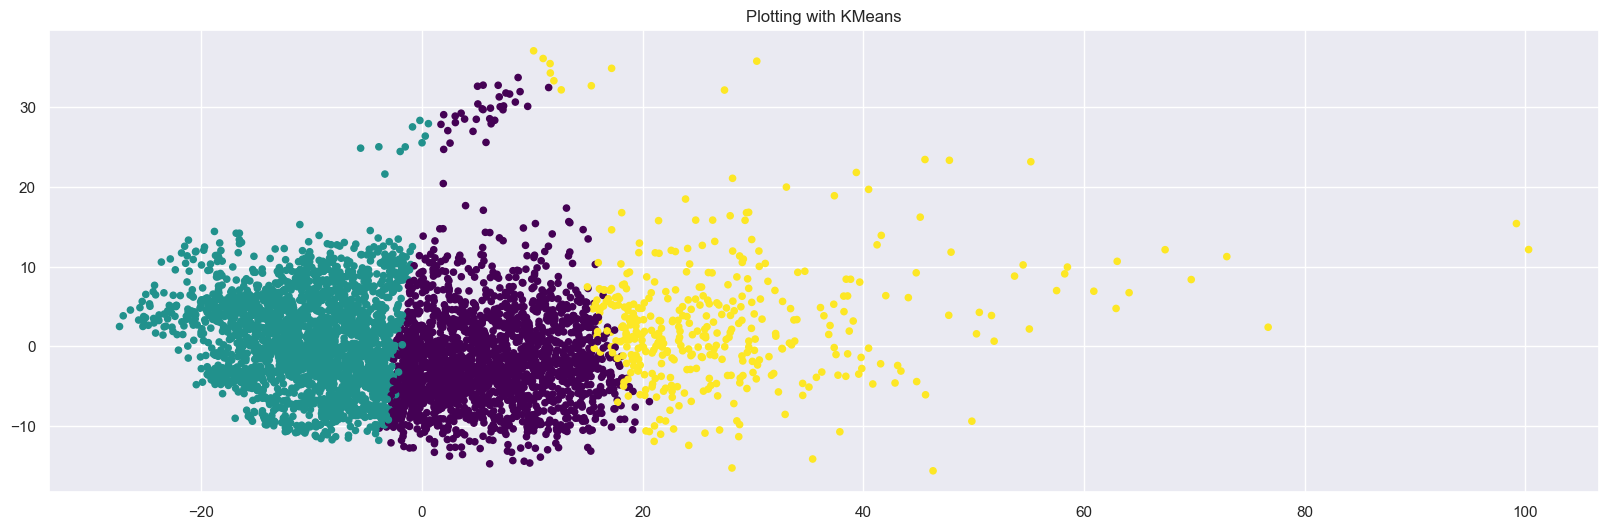

In [172]:
plt.figure(figsize=(20,6))
plt.title("Plotting with KMeans")
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels, s=20,  
            cmap='viridis')

In [173]:
tab = pd.crosstab(codes, cluster_labels, margins=True)
tab.index = ['walking','going up the stairs',
            'going down the stairs', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(3)] + ['all']
tab

,cluster1,cluster2,cluster3,all
walking,780,846,96,1722
going up the stairs,882,245,279,1406
going down the stairs,360,1163,21,1544
all,2022,2254,396,4672


In [174]:
# Transform data
tsne = TSNE(random_state=3)
tsne_transformed = tsne.fit_transform(tsne_data)

/Users/anastasiapurtova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/anastasiapurtova/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


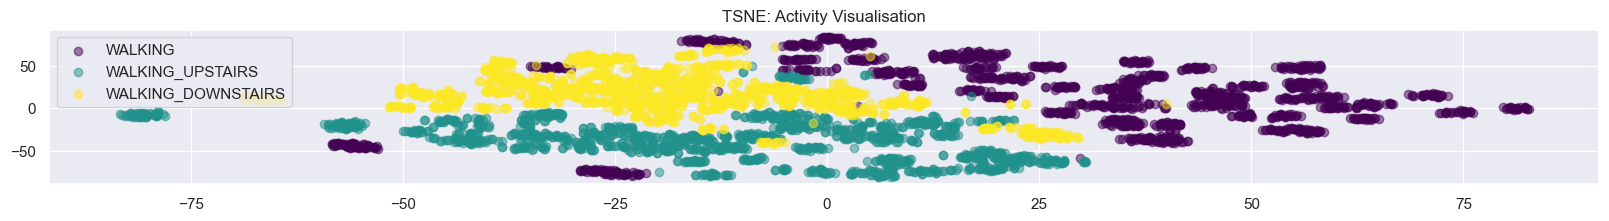

In [175]:
from matplotlib.cm import get_cmap
from matplotlib.colors import rgb2hex
plt.figure(figsize=(20,2))
n = label.unique().shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Plot each activity
for i, group in enumerate(label_counts.index):
    # Mask to separate sets
    mask = (label==group).values
    plt.scatter(x=tsne_transformed[mask][:,0], y=tsne_transformed[mask][:,1], c=colors[i], alpha=0.5, label=group)
plt.title('TSNE: Activity Visualisation')
plt.legend()


In [176]:
full_data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.358455,0.017975,-0.084159,-0.171988,-0.188332,-0.399555,-0.218408,-0.246541,-0.363535,0.244225,...,-0.691170,-0.294788,-0.582192,0.046131,-0.112673,-0.768340,0.256712,0.040474,1,WALKING_DOWNSTAIRS
1,0.301715,-0.007049,-0.093681,-0.040143,-0.141421,-0.325831,-0.079918,-0.182830,-0.281562,0.199676,...,-0.781699,-0.272805,0.315993,0.783686,-0.288010,-0.790764,0.242048,0.032582,1,WALKING_DOWNSTAIRS
2,0.281552,-0.016110,-0.140093,-0.094665,-0.007348,-0.347492,-0.151053,-0.142693,-0.315866,0.199676,...,-0.729144,-0.048504,0.653022,0.972225,0.530882,-0.802236,0.234166,0.031817,1,WALKING_DOWNSTAIRS
3,0.273956,-0.022899,-0.127256,-0.133382,0.132265,-0.336174,-0.211594,-0.051626,-0.318214,0.336350,...,-0.656273,0.000211,0.068551,0.955958,-0.616748,-0.803619,0.231639,0.043237,1,WALKING_DOWNSTAIRS
4,0.299957,0.014082,-0.082310,0.069268,0.057800,-0.235050,-0.041806,-0.111045,-0.209609,0.531491,...,-0.916847,-0.027583,0.432610,-0.943390,0.107830,-0.800668,0.233024,0.046865,1,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4667,0.259172,-0.008408,-0.083012,-0.483303,-0.130209,-0.305842,-0.488393,-0.181297,-0.301262,-0.392891,...,0.199377,0.365598,0.076656,0.374991,-0.145443,-0.817014,0.172039,0.125107,24,WALKING
4668,0.248799,-0.015695,-0.103801,-0.510188,-0.111773,-0.322375,-0.507802,-0.182804,-0.320156,-0.463048,...,-0.187534,0.947383,-0.338707,-0.806335,0.352414,-0.822527,0.170455,0.121438,24,WALKING
4669,0.247290,-0.024840,-0.141388,-0.593275,-0.124444,-0.427655,-0.614110,-0.196080,-0.430790,-0.508640,...,-0.576973,0.211248,-0.708733,0.271323,-0.529599,-0.819168,0.175519,0.120376,24,WALKING
4670,0.277149,0.003709,-0.113742,-0.594104,-0.093302,-0.441025,-0.626089,-0.136955,-0.424460,-0.514281,...,-0.313433,0.071932,-0.594592,0.482462,0.103639,-0.809132,0.180466,0.125399,24,WALKING


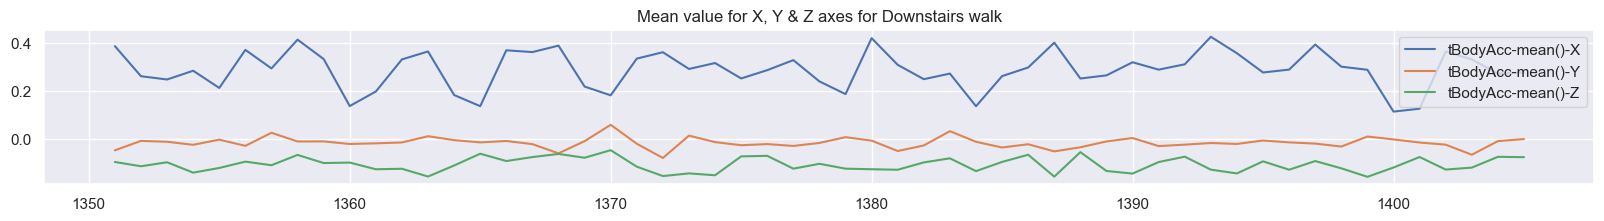

In [177]:
plt.figure(figsize=(20,2))
is_sub_24_DOWN = full_data_DOWN['subject'] == 24
X_full_DOWN = full_data_DOWN["tBodyAcc-mean()-X"]
Y_full_DOWN = full_data_DOWN["tBodyAcc-mean()-Y"]
Z_full_DOWN = full_data_DOWN["tBodyAcc-mean()-Z"]
X_DOWN = X_full_DOWN[is_sub_24_DOWN]
Y_DOWN = Y_full_DOWN[is_sub_24_DOWN]
Z_DOWN = Z_full_DOWN[is_sub_24_DOWN]

plt.plot(X_DOWN, label='tBodyAcc-mean()-X')
plt.plot(Y_DOWN, label='tBodyAcc-mean()-Y')
plt.plot(Z_DOWN, label='tBodyAcc-mean()-Z')

plt.title('Mean value for X, Y & Z axes for Downstairs walk')
plt.legend()
plt.show()

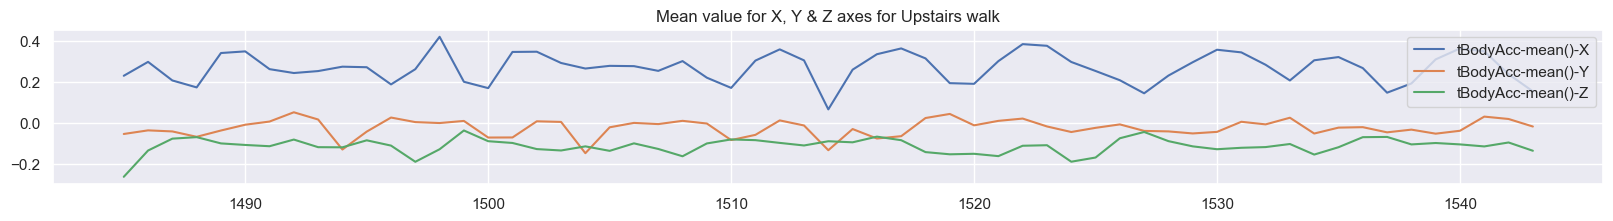

In [178]:
plt.figure(figsize=(20,2))
is_sub_24_UP = full_data_UP['subject'] == 24
X_full_UP = full_data_UP["tBodyAcc-mean()-X"]
Y_full_UP = full_data_UP["tBodyAcc-mean()-Y"]
Z_full_UP = full_data_UP["tBodyAcc-mean()-Z"]
X_UP = X_full_UP[is_sub_24_UP]
Y_UP = Y_full_UP[is_sub_24_UP]
Z_UP = Z_full_UP[is_sub_24_UP]

plt.plot(X_UP, label='tBodyAcc-mean()-X')
plt.plot(Y_UP, label='tBodyAcc-mean()-Y')
plt.plot(Z_UP, label='tBodyAcc-mean()-Z')

plt.title('Mean value for X, Y & Z axes for Upstairs walk')
plt.legend()
plt.show()

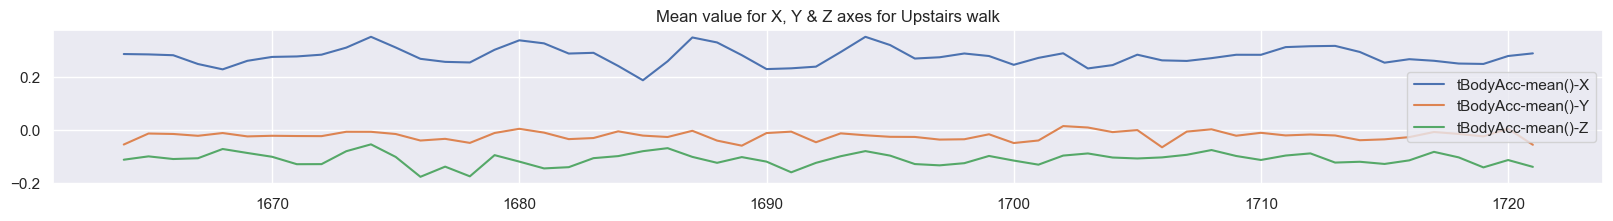

In [179]:
plt.figure(figsize=(20,2))
is_sub_24_WALKING = full_data_WALKING['subject'] == 24
X_full_WALKING = full_data_WALKING["tBodyAcc-mean()-X"]
Y_full_WALKING = full_data_WALKING["tBodyAcc-mean()-Y"]
Z_full_WALKING = full_data_WALKING["tBodyAcc-mean()-Z"]
X_WALKING = X_full_WALKING[is_sub_24_WALKING]
Y_WALKING = Y_full_WALKING[is_sub_24_WALKING]
Z_WALKING = Z_full_WALKING[is_sub_24_WALKING]

plt.plot(X_WALKING, label='tBodyAcc-mean()-X')
plt.plot(Y_WALKING, label='tBodyAcc-mean()-Y')
plt.plot(Z_WALKING, label='tBodyAcc-mean()-Z')

plt.title('Mean value for X, Y & Z axes for Upstairs walk')
plt.legend()
plt.show()

In [180]:
# plt.figure(figsize=(20,2))
# plt.plot(example_downstairs['Acceleration x (m/s^2)'], label='Acceleration x (m/s^2)')
# plt.plot(example_downstairs['Acceleration y (m/s^2)'], label='Acceleration y (m/s^2)')
# plt.plot(example_downstairs['Acceleration z (m/s^2)'], label='Acceleration z (m/s^2)')

# plt.title('Raw values for X, Y & Z axes for Downstairs walk')
# plt.legend()
# plt.show()

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 92.19251336898395
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 92.19251336898395
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 92.19251336898395


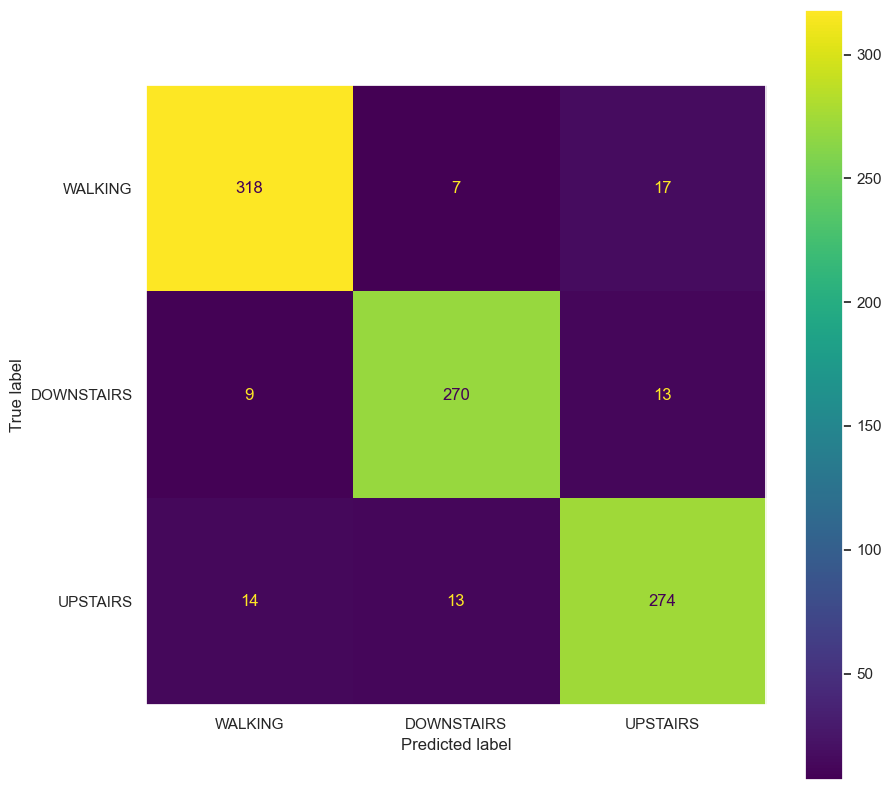

In [182]:
# Decision Tree
# https://www.kaggle.com/code/essammohamed4320/human-activity-recognition-scientific-prespective?scriptVersionId=107355415&cellId=41
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

X = full_data.drop(['subject', 'Activity'], axis=1)
y = full_data['Activity']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

kernal_evals = dict()

def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['WALKING', 'DOWNSTAIRS',
       'UPSTAIRS'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)
    
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)